In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nummetpy import runge_kutta_fourth
from scipy.linalg import expm
import warnings
import math

## 1. Sphere on a sphere 

In [2]:
# Physical parameters
j1 = 2
j2 = 1.5
j3 = 3

def eq(Y):
    p1, p2, p3, o1, o2, o3 = Y[0], Y[1], Y[2], Y[3], Y[4], Y[5]
    
    vp1 = (j3 - j2)*(j1 + 1)*o2*o3
    vp2 = (j1 - j3)*(j2 + 1)*o1*o3
    vp3 = 0
    vo1 = (j2 - j3)*(j1 + 1)*o2*o3
    vo2 = (j3 - j1)*(j2 + 1)*o1*o3
    vo3 = (j1 - j2)*(j3)*o1*o2
    
    return np.array([vp1, vp2, vp3, vo1, vo2, vo3])

def constraint(Y):
    p1, p2, p3, o1, o2, o3, vp1, vp2, vp3, vo1, vo2, vo3 = Y[0], Y[1], Y[2], Y[3], Y[4], Y[5], Y[6], Y[7], Y[8], Y[9], Y[10], Y[11]
    
    constraint1 = vp2 + vo2
    constraint2 = vp1 + vo1    
    return np.array([constraint1, constraint2])

# Time parameters
T = 10 #total time
dt = 0.01  # time step
N = int(T / dt)


# Arrays to store the trajectory
p1 = np.zeros(N)
p2 = np.zeros(N)
p3 = np.zeros(N)
o1 = np.zeros(N)
o2 = np.zeros(N)
o3 = np.zeros(N)
vp1 = np.zeros(N)
vp2 = np.zeros(N)
vp3 = np.zeros(N)
vo1 = np.zeros(N)
vo2 = np.zeros(N)
vo3 = np.zeros(N)
h1 = np.zeros(N)
h2 = np.zeros(N)
#E = np.zeros(N)
 
############# Repeating part ######################

# Initial conditions
p10 = 1
p20 = 1
p30 = 1
o10 = -1
o20 = -1
o30 = 0
vp10 = 0
vp20 = 1
vp30 = 0
vo10 = 0
vo20 = -1
vo30 = 1

# Initial values

p1[0] = p10
p2[0] = p20
p3[0] = p30
o1[0] = o10
o2[0] = o20
o3[0] = o30
vp1[0] = vp10
vp2[0] = vp20
vp3[0] = vp30
vo1[0] = vo10
vo2[0] = vo20
vo3[0] = vo30

h1[0] = constraint([p1[0], p2[0], p3[0], o1[0], o2[0], o3[0], vp1[0], vp2[0], vp3[0], vo1[0], vo2[0], vo3[0]])[0]
h2[0] = constraint([p1[0], p2[0], p3[0], o1[0], o2[0], o3[0], vp1[0], vp2[0], vp3[0], vo1[0], vo2[0], vo3[0]])[1]

#E[0] = energy([x[0], y[0], th[0], vx[0], vy[0], vth[0]])

# Time integration using the Symplectic Euler method/Runge-Kutta fourth order method
for i in range(1, N):
    #x[i], y[i], vx[i], vy[i] = symplectic_euler_step(x[i-1], y[i-1], vx[i-1], vy[i-1], dt, mu)
    New = runge_kutta_fourth(eq, np.array([p1[i-1], p2[i-1], p3[i-1], o1[i-1], o2[i-1], o3[i-1]]),dt)
    p1[i], p2[i], p3[i], o1[i], o2[i], o3[i] = New[0], New[1], New[2], New[3], New[4], New[5]
    h1[i] = constraint([p1[i], p2[i], p3[i], o1[i], o2[i], o3[i], vp1[i], vp2[i], vp3[i], vo1[i], vo2[i], vo3[i]])[0]
    h2[i] = constraint([p1[i], p2[i], p3[i], o1[i], o2[i], o3[i], vp1[i], vp2[i], vp3[i], vo1[i], vo2[i], vo3[i]])[1]

    

    

    
# The Cayley map where from skew-symmetric matrices we construct rotation matrices


def skew(w):
    """Return skew-symmetric matrix of a 3D vector w."""
    return np.array([
        [0, -w[2], w[1]],
        [w[2], 0, -w[0]],
        [-w[1], w[0], 0]
    ])

def cayley_so3(omega):
    """Cayley map from so(3) to SO(3) for a 3D vector omega."""
    omega_hat = skew(omega)
    I = np.eye(3)
    return np.linalg.inv(I - 0.5 * omega_hat) @ (I + 0.5 * omega_hat)


# Output lists for the 9 entries of each rotation matrix
S11, S12, S13 = [], [], []
S21, S22, S23 = [], [], []
S31, S32, S33 = [], [], []

R11, R12, R13 = [], [], []
R21, R22, R23 = [], [], []
R31, R32, R33 = [], [], []

# Process each i-th twist and store rotation matrix entries
for i in range(N):
    pe_i = np.array([p1[i], p2[i], p3[i]])
    omega_i = np.array([o1[i], o2[i], o3[i]])
    S = cayley_so3(pe_i)       # position matrix
    R = cayley_so3(omega_i)    # rotation matrix

    S11.append(S[0, 0])
    S12.append(S[0, 1])
    S13.append(S[0, 2])
    S21.append(S[1, 0])
    S22.append(S[1, 1])
    S23.append(S[1, 2])
    S31.append(S[2, 0])
    S32.append(S[2, 1])
    S33.append(S[2, 2])
    
    R11.append(R[0, 0])
    R12.append(R[0, 1])
    R13.append(R[0, 2])
    R21.append(R[1, 0])
    R22.append(R[1, 1])
    R23.append(R[1, 2])
    R31.append(R[2, 0])
    R32.append(R[2, 1])
    R33.append(R[2, 2])

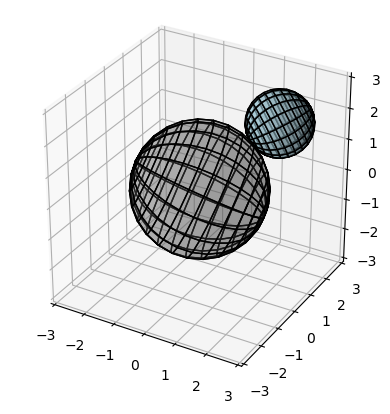

In [5]:
# Make animation - mp4
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Example: Use existing rotation matrix lists R11 ... R33
N = len(R11)  # number of frames / time steps

# Create the two spheres
u, v = np.linspace(0, 2 * np.pi, 20), np.linspace(0, np.pi, 15)
x = np.outer(np.cos(u), np.sin(v))  # shape (20, 15)
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))

points = np.stack((x, y, z), axis=-1)  # shape (20, 15, 3)

u2, v2 = np.linspace(0, 2 * np.pi, 20), np.linspace(0, np.pi, 15)
x2 = 2 * np.outer(np.cos(u2), np.sin(v2))
y2 = 2 * np.outer(np.sin(u2), np.sin(v2))
z2 = 2 * np.outer(np.ones_like(u2), np.cos(v2))

points2 = np.stack((x2, y2, z2), axis=-1)  # shape (20, 15, 3)


# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_box_aspect([1,1,1])  # for a proper sphere


# Animation function
def update(frame):
    ax.collections.clear()  # remove previous surface
        
    # Get current rotation matrix
    R = np.array([
        [R11[frame], R12[frame], R13[frame]],
        [R21[frame], R22[frame], R23[frame]],
        [R31[frame], R32[frame], R33[frame]],
    ])

    # Rotate all sphere points
    rotated = np.tensordot(points, R, axes=([2], [0]))  # shape (20, 15, 3)
    rotated2 = np.tensordot(points2, R.T, axes=([2], [0]))  # shape (20, 15, 3)
        
    # Get translation vector for this frame
    dx, dy, dz = S13[frame], S23[frame], S33[frame]

    # Add translation vector to every point
    rotated[..., 0] += 3*dx
    rotated[..., 1] += 3*dy
    rotated[..., 2] += 3*dz

    # Unpack for plotting
    x_rot, y_rot, z_rot = rotated[..., 0], rotated[..., 1], rotated[..., 2]
    x2_rot, y2_rot, z2_rot = rotated2[..., 0], rotated2[..., 1], rotated2[..., 2]
    
    # Plot rotated sphere
    ax.plot_surface(x_rot, y_rot, z_rot, color='lightblue', edgecolor='k', alpha=0.6)
    ax.plot_surface(x2_rot, y2_rot, z2_rot, color='gray', edgecolor='k', alpha=0.3)


    return ax,

# # Save as MP4
ani = FuncAnimation(fig, update, frames=N, interval=50, blit=False)
ani.save("rotating_sphere.mp4", writer='ffmpeg', fps=20)

